<a href="https://colab.research.google.com/github/sghenimi/ScratchML/blob/master/women_salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://bit.ly/2S8EHj3', ',')

In [5]:
df.head()

,Category,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,MANAGEMENT,Chief executives,1046,2041,763,2251,283,1836
1,MANAGEMENT,General and operations managers,823,1260,621,1347,202,1002
2,MANAGEMENT,Legislators,8,Na,5,Na,4,Na
3,MANAGEMENT,Advertising and promotions managers,55,1050,29,Na,26,Na
4,MANAGEMENT,Marketing and sales managers,948,1462,570,1603,378,1258


In [16]:
df

,Category,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,MANAGEMENT,Chief executives,1046,2041,763,2251,283,1836
1,MANAGEMENT,General and operations managers,823,1260,621,1347,202,1002
2,MANAGEMENT,Legislators,8,Na,5,Na,4,Na
3,MANAGEMENT,Advertising and promotions managers,55,1050,29,Na,26,Na
4,MANAGEMENT,Marketing and sales managers,948,1462,570,1603,378,1258
...,...,...,...,...,...,...,...,...
531,TRANSPORTATION,Pumping station operators,18,Na,17,Na,1,Na
532,TRANSPORTATION,Refuse and recyclable material collectors,72,501,66,496,6,Na
533,TRANSPORTATION,Mine shuttle car operators,0,Na,0,Na,0,Na
534,TRANSPORTATION,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na


In [6]:
df.shape

(536, 8)

In [7]:
df.columns

Index(['Category', 'Occupation', 'All_workers', 'All_weekly', 'M_workers',
       'M_weekly', 'F_workers', 'F_weekly'],
      dtype='object')

In [10]:

df.Category.value_counts()

PRODUCTION                 81
OFFICE                     52
CONSTRUCTION               40
MAINTENANCE                37
TRANSPORTATION             36
HEALTHCARE PROFESSIONAL    33
MANAGEMENT                 30
BUSINESS                   28
SCIENCE                    23
ENGINEERING                21
SERVICE                    20
ARTS                       19
PROTECTIVE SERVICE         18
SALES                      18
COMPUTATIONAL              16
SOCIAL SERVICE             14
CULINARY                   13
EDUCATION                  11
HEALTHCARE SUPPORT         11
AGRICULTURAL                9
GROUNDSKEEPING              6
Name: Category, dtype: int64

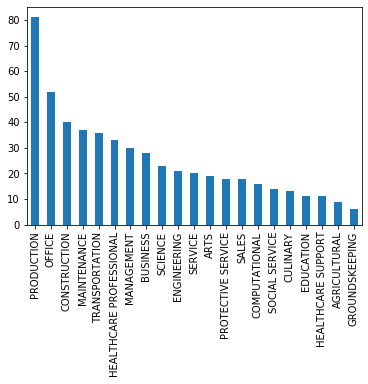

In [12]:
df.Category.value_counts().plot.bar()

In [13]:
df.describe()

,All_workers,M_workers,F_workers
count,536.000000,536.000000,536.000000
mean,206.024254,114.498134,91.490672
std,382.499064,229.333704,228.794729
min,0.000000,0.000000,0.000000
25%,20.000000,11.000000,2.750000
50%,63.000000,32.000000,16.000000
75%,191.500000,101.750000,69.000000
max,2806.000000,2582.000000,2262.000000


In [14]:
df.dtypes

Category       object
Occupation     object
All_workers     int64
All_weekly     object
M_workers       int64
M_weekly       object
F_workers       int64
F_weekly       object
dtype: object

In [0]:

df.All_weekly = pd.to_numeric(df.All_weekly, errors='coerce')

In [0]:
df.F_weekly = pd.to_numeric(df.F_weekly, errors='coerce')

In [0]:
df.M_weekly = pd.to_numeric(df.M_weekly, errors='coerce')

In [22]:
df.dtypes

Category        object
Occupation      object
All_workers      int64
All_weekly     float64
M_workers        int64
M_weekly       float64
F_workers        int64
F_weekly       float64
dtype: object

In [23]:
df.describe()

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,536.000000,300.000000,536.000000,210.000000,536.000000,170.000000
mean,206.024254,914.476667,114.498134,1009.671429,91.490672,811.341176
std,382.499064,356.184654,229.333704,403.694756,228.794729,309.561746
min,0.000000,354.000000,0.000000,389.000000,0.000000,380.000000
25%,20.000000,624.000000,11.000000,678.250000,2.750000,549.500000
50%,63.000000,860.500000,32.000000,926.000000,16.000000,740.000000
75%,191.500000,1129.000000,101.750000,1264.750000,69.000000,987.500000
max,2806.000000,2041.000000,2582.000000,2251.000000,2262.000000,1836.000000


In [25]:
df.isna().sum()

Category         0
Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

In [28]:
df1 = df.copy()
df1.dtypes

Category        object
Occupation      object
All_workers      int64
All_weekly     float64
M_workers        int64
M_weekly       float64
F_workers        int64
F_weekly       float64
dtype: object

In [30]:
df_cleaned = df.dropna()
df_cleaned.shape

(120, 8)

In [35]:
df_top_salary = df_cleaned.sort_values(by='F_weekly',ascending=False)
df_top_salary.head(5)

,Category,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,MANAGEMENT,Chief executives,1046,2041.0,763,2251.0,283,1836.0
166,HEALTHCARE PROFESSIONAL,Pharmacists,206,1920.0,98,2117.0,108,1811.0
127,SOCIAL SERVICE,Lawyers,803,1886.0,503,1914.0,300,1717.0
7,MANAGEMENT,Computer and information systems managers,636,1728.0,466,1817.0,169,1563.0
167,HEALTHCARE PROFESSIONAL,Physicians and surgeons,740,1824.0,457,1915.0,283,1533.0


In [37]:
df_comp_salary = df_top_salary.set_index('Occupation')
df_comp_salary

,Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
Occupation,,,,,,,
Chief executives,MANAGEMENT,1046,2041.0,763,2251.0,283,1836.0
Pharmacists,HEALTHCARE PROFESSIONAL,206,1920.0,98,2117.0,108,1811.0
Lawyers,SOCIAL SERVICE,803,1886.0,503,1914.0,300,1717.0
Computer and information systems managers,MANAGEMENT,636,1728.0,466,1817.0,169,1563.0
Physicians and surgeons,HEALTHCARE PROFESSIONAL,740,1824.0,457,1915.0,283,1533.0
...,...,...,...,...,...,...,...
Cashiers,SALES,1342,415.0,411,471.0,931,405.0
Cooks,CULINARY,1302,416.0,808,427.0,494,400.0
Miscellaneous agricultural workers,AGRICULTURAL,613,445.0,511,460.0,102,398.0


In [39]:
df_comp_salary[['F_weekly', 'M_weekly']]

,F_weekly,M_weekly
Occupation,,
Chief executives,1836.0,2251.0
Pharmacists,1811.0,2117.0
Lawyers,1717.0,1914.0
Computer and information systems managers,1563.0,1817.0
Physicians and surgeons,1533.0,1915.0
...,...,...
Cashiers,405.0,471.0
Cooks,400.0,427.0
Miscellaneous agricultural workers,398.0,460.0


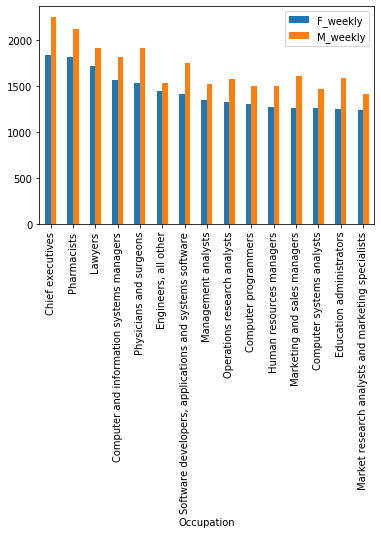

In [43]:
df_comp_salary[['F_weekly', 'M_weekly']][:15].plot.bar()

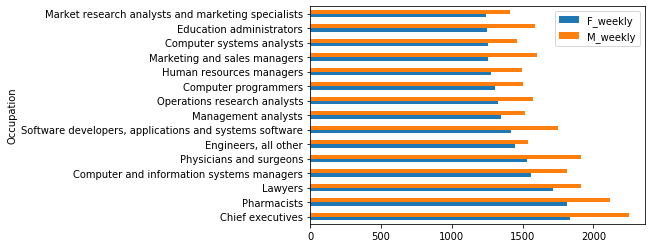

In [44]:
df_comp_salary[['F_weekly', 'M_weekly']][:15].plot.barh()

In [45]:
(df_comp_salary.M_weekly/df_comp_salary.F_weekly - 1)*100

Occupation
Chief executives                                                      22.603486
Pharmacists                                                           16.896742
Lawyers                                                               11.473500
Computer and information systems managers                             16.250800
Physicians and surgeons                                               24.918461
                                                                        ...    
Cashiers                                                              16.296296
Cooks                                                                  6.750000
Miscellaneous agricultural workers                                    15.577889
Food preparation workers                                               6.701031
Combined food preparation and serving workers, including fast food     5.526316
Length: 120, dtype: float64

In [0]:
df_comp_salary['delta'] = (df_comp_salary.M_weekly/df_comp_salary.F_weekly - 1)*100

In [47]:
df_comp_salary

,Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,delta
Occupation,,,,,,,,
Chief executives,MANAGEMENT,1046,2041.0,763,2251.0,283,1836.0,22.603486
Pharmacists,HEALTHCARE PROFESSIONAL,206,1920.0,98,2117.0,108,1811.0,16.896742
Lawyers,SOCIAL SERVICE,803,1886.0,503,1914.0,300,1717.0,11.473500
Computer and information systems managers,MANAGEMENT,636,1728.0,466,1817.0,169,1563.0,16.250800
Physicians and surgeons,HEALTHCARE PROFESSIONAL,740,1824.0,457,1915.0,283,1533.0,24.918461
...,...,...,...,...,...,...,...,...
Cashiers,SALES,1342,415.0,411,471.0,931,405.0,16.296296
Cooks,CULINARY,1302,416.0,808,427.0,494,400.0,6.750000
Miscellaneous agricultural workers,AGRICULTURAL,613,445.0,511,460.0,102,398.0,15.577889


In [0]:
df_delta = df_comp_salary[['M_weekly', 'F_weekly', 'delta']]

In [50]:
df_delta

,M_weekly,F_weekly,delta
Occupation,,,
Chief executives,2251.0,1836.0,22.603486
Pharmacists,2117.0,1811.0,16.896742
Lawyers,1914.0,1717.0,11.473500
Computer and information systems managers,1817.0,1563.0,16.250800
Physicians and surgeons,1915.0,1533.0,24.918461
...,...,...,...
Cashiers,471.0,405.0,16.296296
Cooks,427.0,400.0,6.750000
Miscellaneous agricultural workers,460.0,398.0,15.577889


In [52]:
df_delta.sort_values(by='delta', ascending=False)

,M_weekly,F_weekly,delta
Occupation,,,
"Securities, commodities, and financial services sales agents",1461.0,767.0,90.482399
Personal financial advisors,1738.0,1033.0,68.247822
LEGAL,1877.0,1135.0,65.374449
"Sales representatives, services, all other",1147.0,699.0,64.091559
Advertising sales agents,1155.0,729.0,58.436214
...,...,...,...
"Bookkeeping, accounting, and auditing clerks",690.0,692.0,-0.289017
Police and sheriff's patrol officers,1001.0,1009.0,-0.792864
"Office clerks, general",609.0,622.0,-2.090032


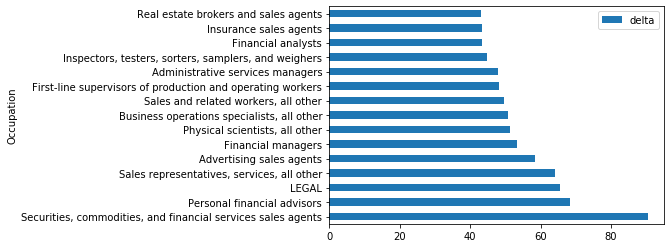

In [58]:
df_delta.sort_values(by='delta', ascending=False)[:15].plot.barh(y='delta')

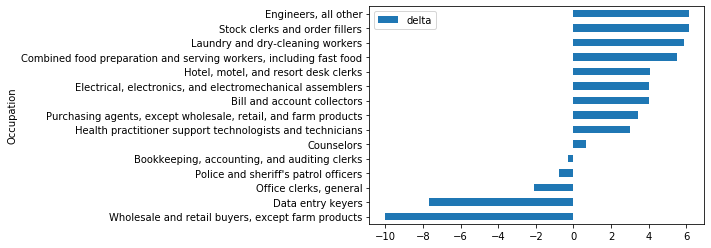

In [59]:
df_delta.sort_values(by='delta', ascending=True)[:15].plot.barh(y='delta')

In [0]:
import seaborn as sns
sns.set()


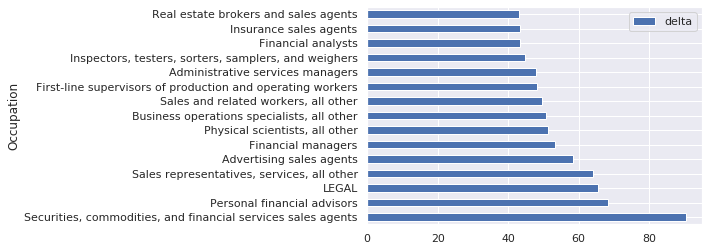

In [65]:
df_delta.sort_values(by='delta', ascending=False)[:15].plot.barh(y='delta')

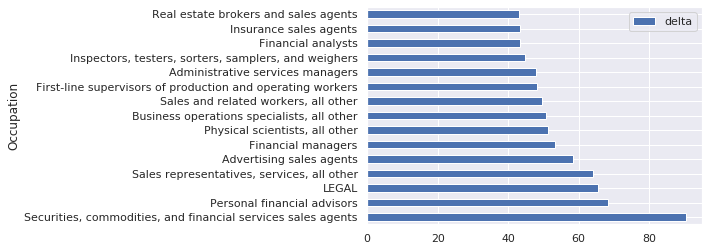

In [66]:
from matplotlib import pyplot as plt
df_delta.sort_values(by='delta', ascending=False)[:15].plot.barh(y='delta')
plt.savefig('test.png')